# TWITTER SENTIMENT ANALYSIS 

### IMPORTING THE REQUIRED PACKAGES AND MODULES

In [68]:
import pandas as pd              #for data analysis and basic operations
import numpy as np               #for data analysis and basic operations
import re                        #for regex
import seaborn as sns            #for data visualisation
import matplotlib.pyplot as plt  #for data visualisation
from matplotlib import style     #style for the plot
style.use('ggplot')
from textblob import TextBlob                    #process the textual data
from nltk.tokenize import word_tokenize          #for tokenization
from nltk.stem import PorterStemmer              #for stemming
from nltk.corpus import stopwords                #to remove stopwords
stop_words = set(stopwords.words('english'))
from sklearn.feature_extraction.text import CountVectorizer                          #to vectorize the text document
from sklearn.model_selection import train_test_split                                 #to split the data into training and testing data
from sklearn.linear_model import LogisticRegression                                  #to perform logistic regression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay # for evaluating accuracy and displaying matrix for evaluating the model

### READING  AND DISPLAYING THE DATASET

In [72]:
df = pd.read_csv('LGBT_Tweets.csv')

In [73]:
df.head(20)

,Unnamed: 0,date,time,id,text,language,replies_count,retweets_count,likes_count
0,0,26-08-2022,10.31.10,1.562990e+18,Praying for my lgbt Nigerians 🙏🏽🙏🏽🙏🏽,en,0,0,0
1,1,26-08-2022,10.31.02,1.562990e+18,@yanmisamm So pass agg omg you really are lgbt,en,0,0,0
2,3,26-08-2022,10.30.59,1.562990e+18,@ChampionExcel @watokohom @MrAndyNgo @football...,en,0,0,0
3,7,26-08-2022,10.30.34,1.562990e+18,To be clear it doesn't justify what the LGBT c...,en,0,0,0
4,10,26-08-2022,10.30.24,1.562990e+18,good night lgbt community https://t.co/0PAMOU...,en,1,0,2
5,12,26-08-2022,10.30.21,1.562990e+18,Hello guys Im Japanese Filipino who does singi...,en,0,0,0
6,13,26-08-2022,10.30.17,1.562990e+18,@SmokeySmoker @Nope_Im_Outski @FOX5Vegas BLM a...,en,0,0,0
7,15,26-08-2022,10.30.12,1.562990e+18,"it's not illegal to be gay in Russia, it's ill...",en,0,0,0
8,16,26-08-2022,10.30.09,1.562990e+18,About 120 asylum-seekers who are members of th...,en,0,0,0
9,18,26-08-2022,10.29.57,1.562990e+18,@URaBold1 v true &amp; it makes it extra insid...,en,0,0,0


In [74]:
df.info()          #to describe the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32456 entries, 0 to 32455
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      32456 non-null  int64  
 1   date            32456 non-null  object 
 2   time            32456 non-null  object 
 3   id              32456 non-null  float64
 4   text            32456 non-null  object 
 5   language        32456 non-null  object 
 6   replies_count   32456 non-null  int64  
 7   retweets_count  32456 non-null  int64  
 8   likes_count     32456 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 2.2+ MB


In [75]:
df.columns        #to obtain the column names

Index(['Unnamed: 0', 'date', 'time', 'id', 'text', 'language', 'replies_count',
       'retweets_count', 'likes_count'],
      dtype='object')

### CREATING A NEW DATAFRAME FOR TWEETS

In [76]:
text_df = df.drop(['Unnamed: 0', 'date', 'time', 'id', 'language', 'replies_count',
       'retweets_count', 'likes_count'], axis=1) #drop all columns except the "text" column
text_df.head(20)                                   #new dataframe

,text
0,Praying for my lgbt Nigerians 🙏🏽🙏🏽🙏🏽
1,@yanmisamm So pass agg omg you really are lgbt
2,@ChampionExcel @watokohom @MrAndyNgo @football...
3,To be clear it doesn't justify what the LGBT c...
4,good night lgbt community https://t.co/0PAMOU...
5,Hello guys Im Japanese Filipino who does singi...
6,@SmokeySmoker @Nope_Im_Outski @FOX5Vegas BLM a...
7,"it's not illegal to be gay in Russia, it's ill..."
8,About 120 asylum-seekers who are members of th...
9,@URaBold1 v true &amp; it makes it extra insid...


In [77]:
print(text_df['text'].iloc[0],"\n")   #analyse data in the "text" dataframe
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

Praying for my lgbt Nigerians 🙏🏽🙏🏽🙏🏽 

@yanmisamm So pass agg omg you really are lgbt 

@ChampionExcel @watokohom @MrAndyNgo @football_56OL Many working in the media, Twitter and FB seem to which is why they have a problem with groomers being called out. Pretty soon they'll come out with a hit piece about these &amp; other pedo hunters, most likely linking them to the alt right or some BS about them being anti LGBT. 

To be clear it doesn't justify what the LGBT community behavior obviously but you have to ask what pushed them so far left in politics 

good night lgbt community  https://t.co/0PAMOUpXUz 



In [78]:
text_df.info() #to describe the new dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32456 entries, 0 to 32455
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    32456 non-null  object
dtypes: object(1)
memory usage: 253.7+ KB


### CONVERSION OF RAW DATA TO USEFUL DATA

In [79]:
def data_processing(text):            #to convert the raw data into usable format
    text = text.lower()
    text = re.sub(r"https\S+|www\S+https\S+", '',text, flags=re.MULTILINE)  #remove URLs
    text = re.sub(r'\@w+|\#','',text) #remove hashtags 
    text = re.sub(r'[^\w\s]','',text) #remove punctuation marks
    text_tokens = word_tokenize(text) #remove stopwords
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [80]:
text_df.text = text_df['text'].apply(data_processing) 

In [81]:
text_df = text_df.drop_duplicates('text')  #remove duplicate data

### STEMMING 

In [82]:
stemmer = PorterStemmer()  #stemming for reducing tokenized words to their root form
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [83]:
text_df['text'] = text_df['text'].apply(lambda x: stemming(x)) #apply stemming to the processed data


In [84]:
text_df.head(20)

,text
0,praying lgbt nigerians
1,yanmisamm pass agg omg really lgbt
2,championexcel atokohom mrandyngo football_56ol...
3,clear doesnt justify lgbt community behavior o...
4,good night lgbt community
5,hello guys im japanese filipino singing living...
6,smokeysmoker nope_im_outski fox5vegas blm lgbt...
7,illegal gay russia illegal push lgbt propagand...
8,120 asylumseekers members lgbt community allow...
9,urabold1 v true amp makes extra insidious way ...


In [85]:
print(text_df['text'].iloc[0],"\n") 
print(text_df['text'].iloc[1],"\n")
print(text_df['text'].iloc[2],"\n")
print(text_df['text'].iloc[3],"\n")
print(text_df['text'].iloc[4],"\n")

praying lgbt nigerians 

yanmisamm pass agg omg really lgbt 

championexcel atokohom mrandyngo football_56ol many working media twitter fb seem problem groomers called pretty soon theyll come hit piece amp pedo hunters likely linking alt right bs anti lgbt 

clear doesnt justify lgbt community behavior obviously ask pushed far left politics 

good night lgbt community 



In [86]:
text_df.info() #updated dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30585 entries, 0 to 32455
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    30585 non-null  object
dtypes: object(1)
memory usage: 477.9+ KB


### CALCULATING THE POLARITY

In [87]:
def polarity(text):                          #to calculate polarity using TextBlob
    return TextBlob(text).sentiment.polarity

In [88]:
text_df['polarity'] = text_df['text'].apply(polarity)

In [89]:
text_df.head(20)

,text,polarity
0,praying lgbt nigerians,0.000000
1,yanmisamm pass agg omg really lgbt,0.200000
2,championexcel atokohom mrandyngo football_56ol...,0.258929
3,clear doesnt justify lgbt community behavior o...,0.050000
4,good night lgbt community,0.700000
5,hello guys im japanese filipino singing living...,0.480000
6,smokeysmoker nope_im_outski fox5vegas blm lgbt...,0.375000
7,illegal gay russia illegal push lgbt propagand...,-0.136667
8,120 asylumseekers members lgbt community allow...,0.000000
9,urabold1 v true amp makes extra insidious way ...,0.051667


### OBTAINING THE SENTIMENT LABEL FOR EACH TWEET

In [90]:
def sentiment(label):     #to define the sentiment of a particular tweet
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [91]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)

In [135]:
text_df.head(20)

,text,polarity,sentiment
0,praying lgbt nigerians,0.000000,Neutral
1,yanmisamm pass agg omg really lgbt,0.200000,Positive
2,championexcel atokohom mrandyngo football_56ol...,0.258929,Positive
3,clear doesnt justify lgbt community behavior o...,0.050000,Positive
4,good night lgbt community,0.700000,Positive
5,hello guys im japanese filipino singing living...,0.480000,Positive
6,smokeysmoker nope_im_outski fox5vegas blm lgbt...,0.375000,Positive
7,illegal gay russia illegal push lgbt propagand...,-0.136667,Negative
8,120 asylumseekers members lgbt community allow...,0.000000,Neutral
9,urabold1 v true amp makes extra insidious way ...,0.051667,Positive


### VISUALIZATION OF DATA USING COUNTPLOT AND PIE CHART

<AxesSubplot:xlabel='sentiment', ylabel='count'>

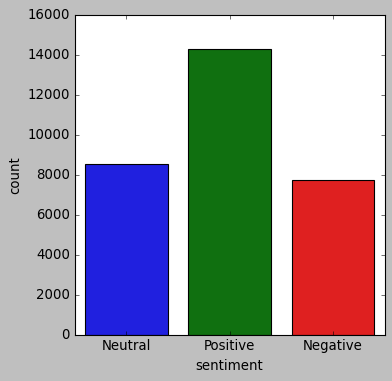

In [136]:
fig = plt.figure(figsize=(5,5))                #data visualization using countplot
sns.countplot(x='sentiment', data = text_df)

Text(0.5, 1.0, '*** VISUALIZATION OF SENTIMENTS ***')

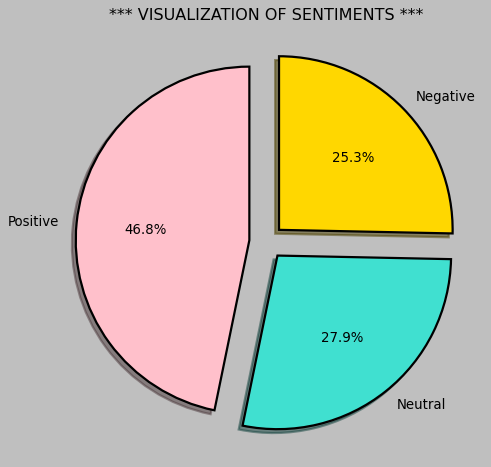

In [137]:
fig = plt.figure(figsize=(7,7))                #data visualization using pie chart
colors = ("pink", "turquoise", "gold")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('*** VISUALIZATION OF SENTIMENTS ***')

### BUILDING THE MODEL

In [138]:
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['text'])  #count vectorization for the model

In [148]:
feature_names = vect.get_feature_names()                        #get and print the first 30 features
print("Total number of features are: {}\n".format(len(feature_names)))
print("The first 30 features are:\n {}".format(feature_names[:30]))

Total number of features are: 405708

The first 30 features are:
 ['00', '00 correct', '000', '000 per', '000 size', '00s', '00s even', '00s internet', '00s lgbt', '00s mainstream', '00s wasnt', '00s yaoi', '01', '01 872', '01 actually', '01 albums', '01 lgbt', '01 lgbtq', '01 spider', '01000100', '01000100 01010010', '01000101', '01000101 01001110', '01000111', '01000111 01000101', '01001110', '01001110 01000100', '01010010', '01010010 lgbt', '01_victhor_01']


In [149]:
X = text_df['text']                 #separation of data into x and y for transformation
Y = text_df['sentiment']
X = vect.transform(X)

In [150]:
#split the data into training and testing data

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [151]:
#print the size of training and testing data

print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))

print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (24468, 405708)
Size of y_train: (24468,)
Size of x_test: (6117, 405708)
Size of y_test: (6117,)


In [159]:
#to get rid of warnings

import warnings
warnings.filterwarnings('ignore')

### TRAINING THE MODEL

In [160]:
#train the data on logicticregression model

logreg = LogisticRegression()

logreg.fit(x_train, y_train) #fit the data
logreg_pred = logreg.predict(x_test) #predict the value for test data

logreg_acc = accuracy_score(logreg_pred, y_test) #calculate the accuracy for the model
print("Accuracy of the model is: {:.2f}%".format(logreg_acc*100)) 

Accuracy of the model is: 86.04%


### OBTAINING THE CLASSIFICATION REPORT AND PRINTING THE RELEVANT CONFUSION MATRIX

In [161]:
#print the confusion matrix and classification report


print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[1132  197  210]
 [  38 1568   75]
 [ 118  216 2563]]


              precision    recall  f1-score   support

    Negative       0.88      0.74      0.80      1539
     Neutral       0.79      0.93      0.86      1681
    Positive       0.90      0.88      0.89      2897

    accuracy                           0.86      6117
   macro avg       0.86      0.85      0.85      6117
weighted avg       0.86      0.86      0.86      6117



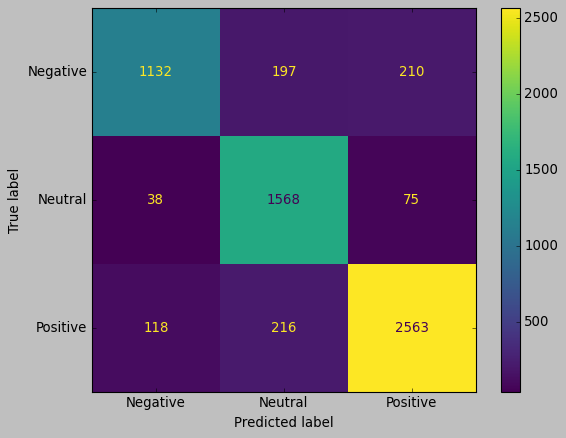

In [163]:
#display the confusion matrix

style.use('classic')
cm = confusion_matrix(y_test, logreg_pred, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=logreg.classes_)
disp.plot()